<a href="https://colab.research.google.com/github/SkyJoyTianle/python/blob/master/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第三章


例　59

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

In [ ]:
def Hermite(j):
    if j == 0:
        return 1
    a = [0] * (j + 2)
    b = [0] * (j + 2)
    a[0] = 1
    for i in range(j):
        print("i",i)
        b[0] = -a[1]
        for k in range(i + 1):
            print("k",k)
            b[k + 1] = 2 * a[k] - (k + 1) * a[k + 2]
            a = b
    return b[:(j+1)]

In [ ]:
Hermite(2)

i 0
k 0
i 1
k 0
k 1


[-2, -4, -8]

In [ ]:
for i in range(1):
    print(i)

0


In [ ]:
Hermite(3)

i 0
k 0
i 1
k 0
k 1
i 2
k 0
k 1
k 2


[4, 16, 32, 64]

In [ ]:
Hermite(4)

i 0
k 0
i 1
k 0
k 1
i 2
k 0
k 1
k 2
i 3
k 0
k 1
k 2
k 3


[-16, -64, -256, -512, -1024]

In [ ]:
def H(j, x):
    coef = Hermite(j)
    print(coef)
    S = 0
    for i in range(j + 1):
        S = S + coef[i] * (x**i)
        return S

In [ ]:
cc = np.sqrt(5) / 4
a = 1/4

def phi(j, x):
    return np.exp(-(cc - a) * x**2) * H(j, np.sqrt(2 * cc) * x)

color = ["b", "g", "r", "k"]

x = np.linspace(-2, 2, 100)
plt.plot(x, phi(0, x), c = color[0], label = "j = 0")
plt.ylim(-2, 8)
plt.ylabel("phi")
for i in range(0, 3):
    plt.plot(x, phi(i, x), c = color[i + 1], label = "j = %d"%i)
plt.title("Characteristic function of Gauss Kernel")

1


TypeError: 'int' object is not subscriptable

例 62

i 0
i 50
i 100
i 150
i 200
i 250


<ipython-input-21-c90c573bc5e0>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  alpha[:, i] = vectors[:, i] * np.sqrt(m) / (values[i] + 10e-16)


Text(0.5, 1.0, 'Eigen Values and their Eigen Functions')

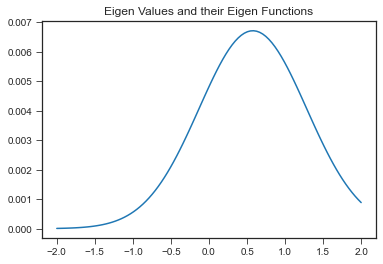

In [ ]:
#Definition of kernel

sigma = 1
def k(x, y):
    return np.exp(-(x - y)**2 / sigma**2)

# generation of sample and matrix
m = 300
x = np.random.randn(m) - 2 * np.random.randn(m)**2 + 3 * np.random.randn(m)**3

#eigenvalue and eigenvector
K = np.zeros((m, m))
for i in range(m):
    if i % 50 == 0:
        print("i", i)
    for j in range(m):
        K[i, j] = k(x[i], x[j])
    values, vectors = np.linalg.eig(K)
    lam = values / m
    alpha = np.zeros((m, m))
    for i in range(m):
        alpha[:, i] = vectors[:, i] * np.sqrt(m) / (values[i] + 10e-16)

#graph

def F(y, i):
    S = 0
    for j in range(m):
        S = S + alpha[j, i] * k(x[j], y)
        return S
i = 1
def G(y):
    return F(y,i)

w = np.linspace(-2, 2, 100)
plt.plot(w, G(w))
plt.title("Eigen Values and their Eigen Functions")

